<a href="https://colab.research.google.com/github/NearANDfar13/NLP_Winter_2024/blob/main/NA_San_Fran_Ex_Data_Word_Clouds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NearANDfar13/NLP_Winter_2024.git

Cloning into 'NLP_Winter_2024'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 159 (delta 3), reused 2 (delta 2), pack-reused 150 (from 1)
Receiving objects: 100% (159/159), 8.69 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [2]:
#Word Cloud method uused in NLP class
#Import the dataset "San Fran Extended Sample"
import pandas as pd

df = pd.read_excel('/content/NLP_Winter_2024/NA_San_Fran_Extended_Sample.xlsx')

#Display DataFrame 'df'
df.head()

,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,3043262-5,19/04/1906,Annener Zeitung,"Annener Zeitung, verbunden mit der Annener Vol...","Annen (Witten), Witten-Annen",NaN,1885-1943,"New=York, 14 Francisco von eine gesucht. Tause...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Westfälische Wilhelms-Universität Münster Univ...
1,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"au- Oakland als Gerücht gemeldet, daß da- amer...",2.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach
2,3118927-1,19/04/1906,Anzeiger vom Oberland,"Anzeiger vom Oberland, Tageszeitung für das Ob...",Biberach an der Riß,täglich,1870-1932,"ertappt wird, zu erschießen. ir Gf Store (CaUf...",6.,https://www.deutsche-digitale-bibliothek.de/ne...,Kreisarchiv des Landkreises Biberach
3,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.,https://www.deutsche-digitale-bibliothek.de/ne...,Badische Landesbibliothek
4,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek


In [3]:
import re
#Function to clean

def initial_clean(text):
    text = re.sub(r'[^\w\s]','',text)
    text = text.lower()
    return text

df['cleaned'] = df['Text'].apply(initial_clean)
df['cleaned'][:5]

,cleaned
0,newyork 14 francisco von eine gesucht tausende...
1,au oakland als gerücht gemeldet daß da amerika...
2,ertappt wird zu erschießen ir gf store cauforn...
3,die marinestationen am süllen ozean versuchten...
4,erdbeben in ealifornien newsjork 18 april heut...


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

def tokenize(text):
  text = nltk.word_tokenize(text, language = 'german')
  return text

#continue the code
df['tokenized'] = df['cleaned'].apply(tokenize)
df['tokenized'][:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,tokenized
0,"[newyork, 14, francisco, von, eine, gesucht, t..."
1,"[au, oakland, als, gerücht, gemeldet, daß, da,..."
2,"[ertappt, wird, zu, erschießen, ir, gf, store,..."
3,"[die, marinestationen, am, süllen, ozean, vers..."
4,"[erdbeben, in, ealifornien, newsjork, 18, apri..."


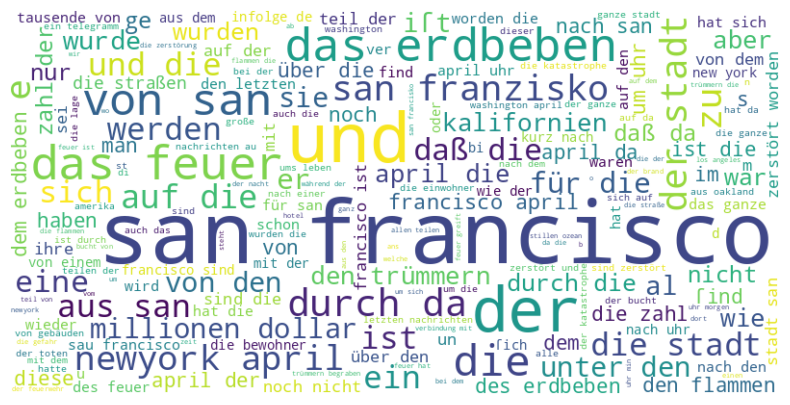

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tokenized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
import spacy
from nltk.corpus import stopwords

# Ensure the German language model is downloaded
!python -m spacy download de_core_news_sm

# Load the German language model
nlp = spacy.load('de_core_news_sm')

# Get German stop words and add custom ones
stop_words = set(stopwords.words('german'))
custom_stop_words = {'herr', 'frau', 'dez', 'januar', 'ge', 'nr', 'ſind', 'handeln'}
stop_words.update(custom_stop_words)

def lemmatize_and_remove_stopwords(texts):
    texts_out = []
    for sent in texts:
        # Join the tokens into a single string
        text = " ".join(sent)


        # Process the text with spaCy
        doc = nlp(text)

        # Lemmatize, lowercase, and remove stop words
        lemmatized = [token.lemma_.lower() for token in doc
                      if token.is_alpha and token.lemma_.lower() not in stop_words]

        texts_out.append(lemmatized)

    return texts_out

# Apply the function to the DataFrame
df['lemmatized'] = lemmatize_and_remove_stopwords(df['tokenized'])

# Display the first 5 rows of the lemmatized column
df['lemmatized'].head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 16.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,lemmatized
0,"[newyork, francisco, suchen, tausend, ausgebro..."
1,"[au, oakland, gerücht, melden, amerikanisch, g..."
2,"[ertappen, erschießen, ir, gf, store, caufornt..."
3,"[marinestatione, sülle, ozean, versuchen, verb..."
4,"[erdbeben, ealifornie, newsjork, april, heute,..."


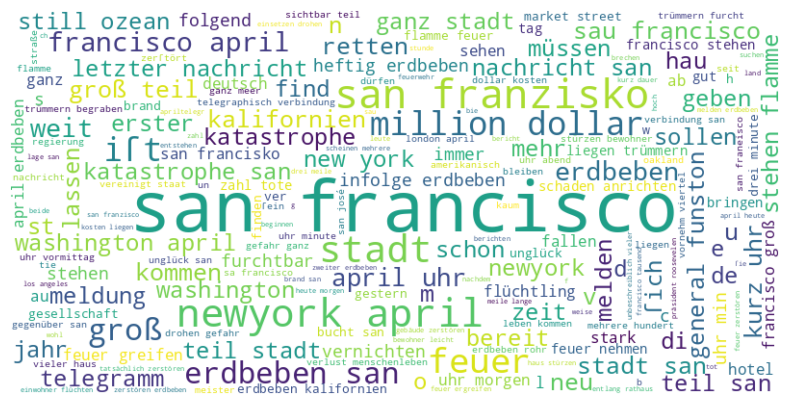

In [7]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['lemmatized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
#POS Tagging
def tagging(texts, allowed_postags=['NOUN']): # possible tags'NOUN', 'ADJ', 'ADV', 'VERB'
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[Post, Teil, Stadt, April, Süden, erdbeben, er..."
1,"[erdbeben, jiextixle, Axftellxxg, Mrer, newbvr..."
2,"[ertappen, Caufornt, April, April, Gaeze, Staa..."
3,"[Marinestatione, Ozean, Verbindung, Bürgermeis..."
4,"[Uhr, Stadt, Minute, Heimgesucht, Find, Beschä..."


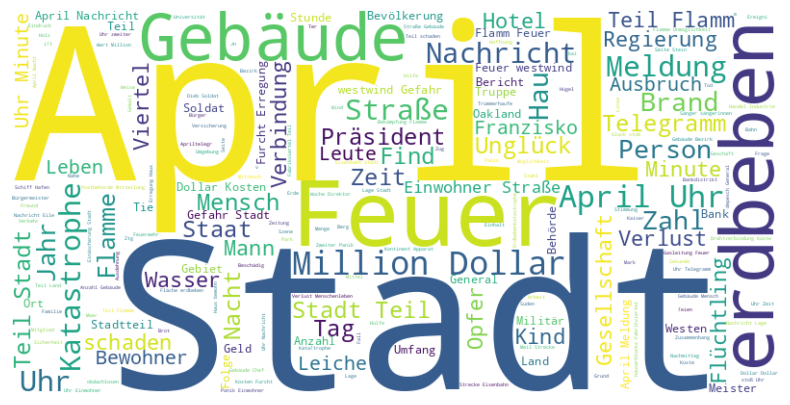

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#POS Tagging with verbs
def tagging(texts, allowed_postags=['VERB']):
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[suchen, erfolgen, erweisen, leichen, besitzen..."
1,"[Melde, ankeren, sinken, Landeinwärt, wafferle..."
2,"[erschießen, erdbeben, erdbeben, verspüren, be..."
3,"[versuch, organisieren, suchen, bringen, errei..."
4,"[erdbeben, erdbeben, zerstören, erhalten, betr..."


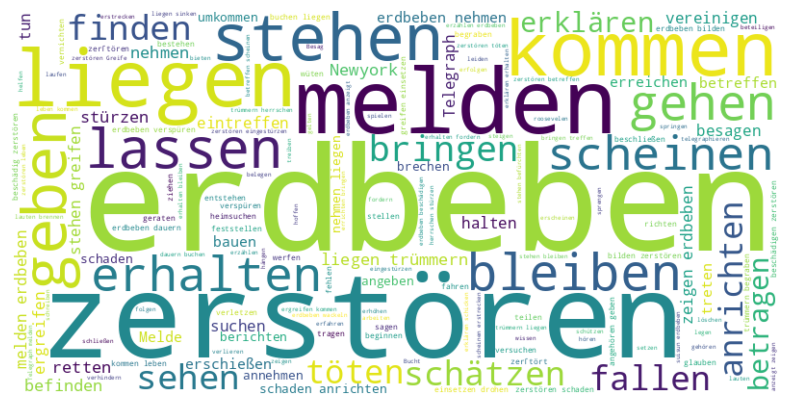

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
#POS Tagging with adjectives
def tagging(texts, allowed_postags=['ADJ']):
    texts_out = []
    nlp = spacy.load('de_core_news_sm')
    for sent in texts:
        sent_str = " ".join(sent)
        doc = nlp(sent_str)
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

df['tagging'] = tagging(df['lemmatized'])
df['tagging'][:5]

,tagging
0,"[fran, Geddbee, März, gelitt, letzter]"
1,"[meil, augebreit, Schranke, trümmer, bormitt, ..."
2,"[Nrwbrk, heimsuch, automobil, vernicht, Feuer,..."
3,"[Herzustelle, erlangen, gekommen, Reutersche, ..."
4,"[postbehörd, angel, schaden, eingestürzen, Zwe..."


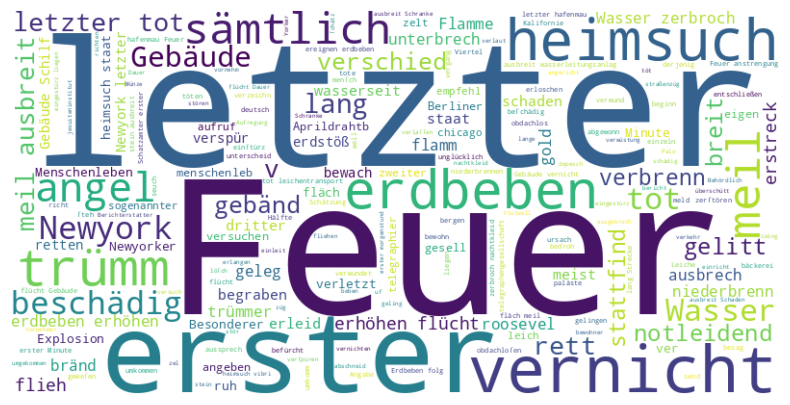

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['tagging'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#Term Freqency Inverse Document Freqency
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert the lists in 'tagging' column to strings
df['lemmatized_str'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# Create and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # You can adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_str'])

# Get feature names (words) and their TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
print("Feature Names:", feature_names)
print("TF-IDF Scores:", tfidf_scores)

# Create a DataFrame with words and their TF-IDF scores
word_tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_score': tfidf_scores})

# Sort by TF-IDF score in descending order (most frequent/important words first)
word_tfidf_df = word_tfidf_df.sort_values('tfidf_score', ascending=False)

# Select top N words (you can adjust this number)
top_n = 1000
top_words = word_tfidf_df['word'].head(top_n).tolist()

# Create the 'j' column in the original DataFrame
df['vectorized'] = df['tagging'].apply(lambda x: [word for word in x if word in top_words])

df['vectorized']


Feature Names: ['aa' 'aach' 'aachener' ... 'ſſtr' 'ꝛc' 'ꝛen']
TF-IDF Scores: [0.05966285 0.32447201 0.1097488  ... 0.10307844 0.19933584 0.25919691]


,vectorized
0,"[fran, gelitt, letzter]"
1,"[trümmer, apparat, erdbeben, erhöhen, erster, ..."
2,"[fliehen, teil, trümmer, erdbeben, erhöhen, er..."
3,"[erlangen, angeben, vernichten, schiff, erster..."
4,"[postbehörd, angel, schaden, eingestürzen, beg..."
...,...
305,"[sprechen, senken, wert, gold, st, letzter]"
306,"[deutsch, botschafter]"
307,[]
308,"[arbeit, vorhanden, tot, erster, depesch, deut..."


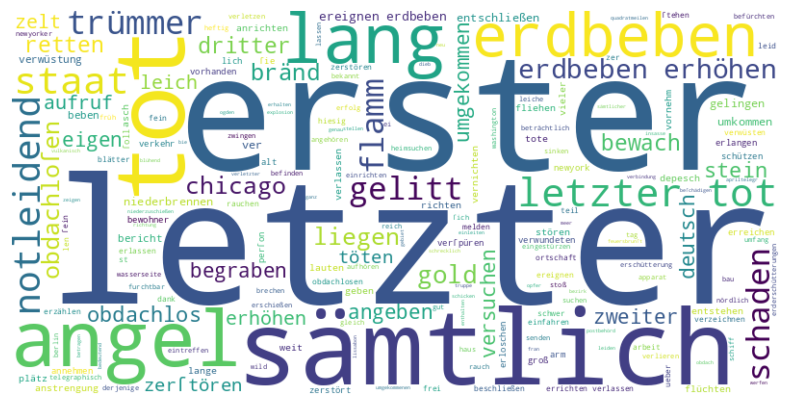

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lists of lemmatized words into a single list
all_words = [word for sublist in df['vectorized'] for word in sublist]

# Create a string of all words
text = ' '.join(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()